# Files and directories

In [ ]:
# import statements
import os
import random
import json
from json import JSONDecodeError

In [ ]:
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f) # dict, list, etc

# data is a dict, list, etc
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

### Review 1: What does sorted() return? 

In [ ]:
d = {"Andy": [850, 955], "Meena": [1100, 1320], "Peyman": ["online"]}
t = (45, 32, 29)
sentence = "Meet me at the Sett"
my_list = sentence.split(" ")

# Predict the output, run the cell and confirm your answers
sorted_d = sorted(d)
print(sorted_d, type(sorted(d)))

sorted_t = sorted(t)
print(sorted_t, type(sorted(t)))

sorted_sentence = sorted(sentence)
print(sorted_sentence, type(sorted(sentence)))

sorted_my_list = sorted(my_list)
print(sorted_my_list, type(sorted(my_list)))

### Review 2: Does sorted return a new object instance or modify the existing object instance?

In [ ]:
# sorted returns a brand new object instance, whereas sort() (list) method 
# modifies the existing object instance

### Review 3: Difference between + and append() method on lists 

In [ ]:
listA = ["Wisconsin", "Madison"]
listB = ["Data" ,  "Science"]

print(listA + listB)        # + operator creates a brand new object instance
print(listA[1] + listB[1])  # just like + operator on strings creates a brand new string object instance
                            # recall that strings are immutable, so you don't have a choice there
listA.append(listB)         # append() method modifies the existing list object instance
print(listA)
print(listB)

## Learning Objectives

- Use built-in functions with files: `open`, `close`, `read`, `write`
- Alternate ways of reading file's contents: for, list
- Use these file-specific os module functions:
    - os.listdir
    - os.mkdir
    - os.path.exists 
    - os.path.isfile
    - os.path.isdir
    - os.path.join
- Use `try`/`except` blocks or a `with` statement to handle errors that may occur when using files

# File processing
- open(...) function call:
    - **IMPORTANT: you must pass relative path as argument to the open function call and you shouldn't hardcode "/" or "\\"**
- processing: either read or write contents
- file_object.close() function call:
    - **you should always close your files!**

<div>
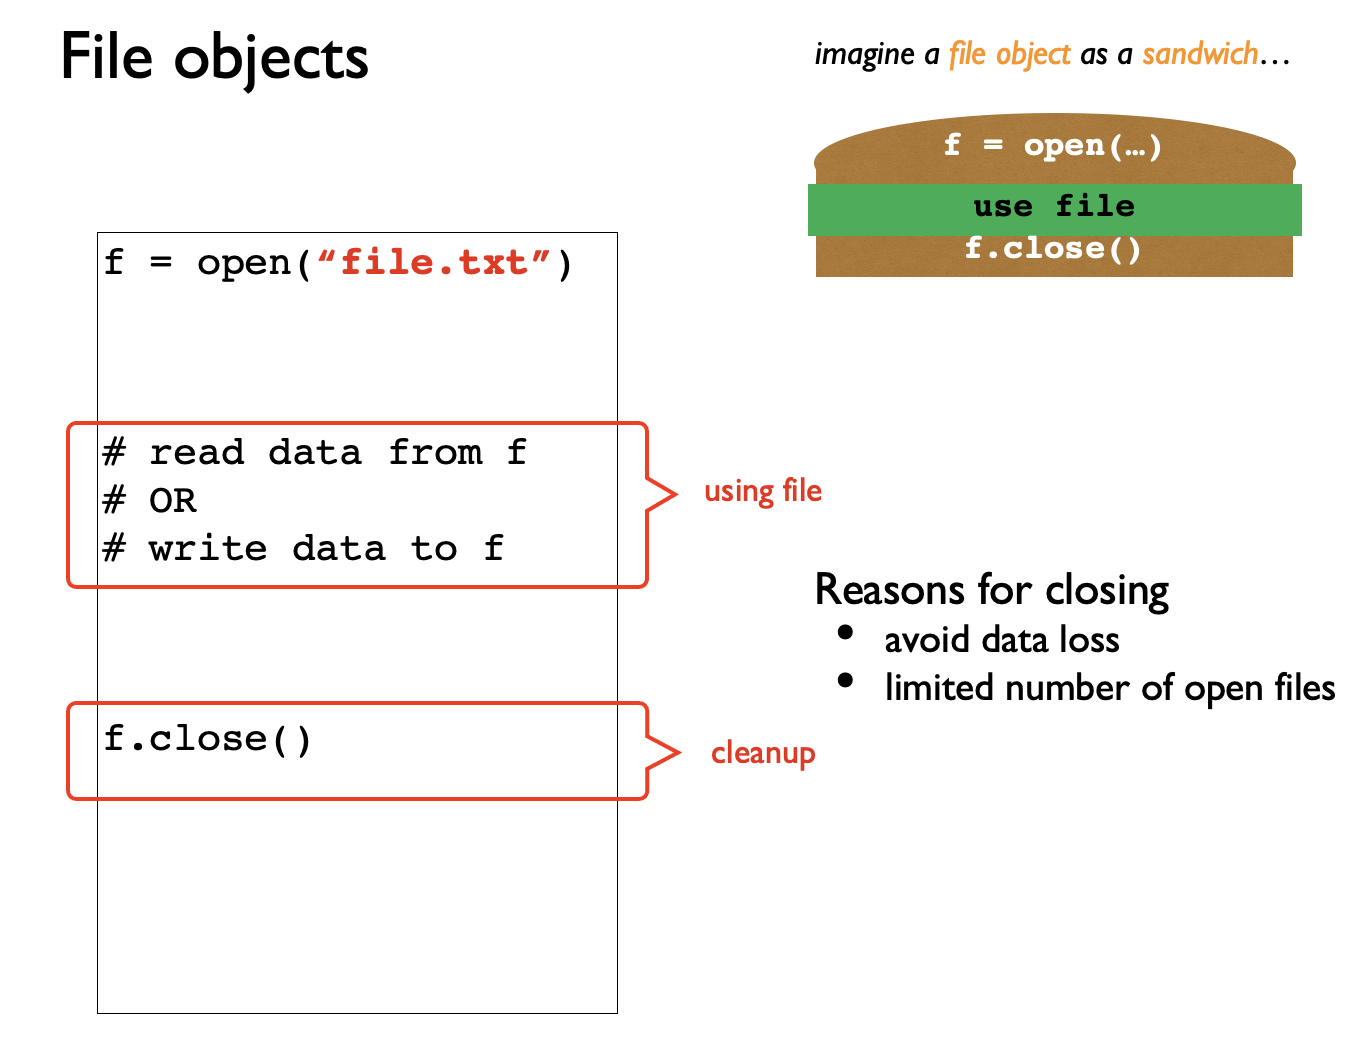
</div>

## Reading data from a file

3 options:
- using read() function call:
    - returns file contents as one big string
- convert file object into a list
    - each line becomes an item within the list
- using for loop to iterate over every line

Using read() function call ... ("hello.txt")

What is the type of return value of read() function?

Suppose "hello.txt" is inside a directory called "somedir", what will the relative path be?

In [ ]:
# Windows: "somedir\hello.txt" <- by the end of today's lecture, we'll learn how not to hardcode this "\"
# MAC: "somedir/hello.txt" <- by the end of today's lecture, we'll learn how not to hardcode this "\"

Converting file objects into a list

What is the type of data_list?

Using for loop to iterate over file object

### Writing data into a file
- "w" mode in open(...) function call
    - **BE CAREFUL: every time you invoke open, you will overwrite the file's contents**
    - "\n" needs to be explicitly written

In [ ]:
print("hello world!")
print("hello cs220!")

In [ ]:
hello_file = open("cs220.txt", "w")
hello_file.write("Hi folks.")
hello_file.close()

In [ ]:
hello_file = open("cs220.txt", "w")
hello_file.write("Hello CS220 / CS319 students.\n")
hello_file.write("Good luck with exam 2 preparation.")
hello_file.write("Ooops forgot newline\n")
hello_file.write("That's all folks!")
hello_file.close()

TODO: Let's read the contents from the file we just wrote. Use the three different styles of reading the content.

## os module functions

- os.mkdir 
- os.path.join
- os.listdir
- os.path.exists 
- os.path.isfile
- os.path.isdir 

In [ ]:
# creates a new directory called "test_dir" inside current working directory


### os.path.join is a very important function, which enables portability of code
- portability enables you to write code in one OS platform and run it on another OS platform
- it enables you to avoid hard-coding "\\" or "/" in the relative path

In [ ]:
path = os.path.join("test_dir", "file1.txt")
print(path)  
# what do you get? 

Now let's use this to create a few files and directories for learning about other os module functions.

In [ ]:
# creating file1.txt inside test_dir

f = open(path, "w")
f.write("file1\n")
f.close()

# creating file2.txt inside test_dir
f = open(os.path.join("test_dir", "file2.txt"), "w")
f.write("file2\n")
f.close()

# creating "test_dir_depth2" inside test_dir
os.mkdir(os.path.join("test_dir", "test_dir_depth2"))

# creating "file1_depth2.txt" and "file2_depth2.txt" inside "test_dir_depth2"
f = open(os.path.join("test_dir", "test_dir_depth2", "file1_depth2.txt"), "w")
f.write("file1_depth2\n")
f.close()

f = open(os.path.join("test_dir", "test_dir_depth2", "file2_depth2.txt"), "w")
f.write("file2_depth2\n")
f.close()

In [ ]:
os.listdir(".") # recall that "." refers to the current working directory

Now, use listdir to look at contents of test_dir and test_dir_depth2.

In [ ]:
os.listdir("test_dir")

In [ ]:
os.listdir(os.path.join("test_dir", "test_dir_depth2"))

Let's learn about os.path functions. os.path is a sub-module of os --- does not need importing again.

In [ ]:
print(os.path.exists("hello.txt")) # yes
print(os.path.isfile("test_dir"))  # no
print(os.path.isdir("test_dir"))   # yes 

Try your own examples of `exists`, `isfile`, and `isdir`.

In [ ]:
print(os.path.exists(os.path.join("test_dir", "file1.txt"))) # yes
print(os.path.exists("file1.txt")) # no, there isn't a file1.txt inside the current working directory
print(os.path.isdir(os.path.join("test_dir", "test_dir_depth2"))) # yes
print(os.path.isfile(os.path.join("test_dir", "test_dir_depth2"))) # no
print(os.path.isdir(os.path.join("test_dir", "test_dir_depth2", "file1_depth2.txt"))) # no
print(os.path.isfile(os.path.join("test_dir", "test_dir_depth2", "file1_depth2.txt"))) # yes

## Exception handling
- FileNotFoundError
- FileExistsError
    - ironically, used for directories, when using `os.mkdir()`
- JSONDecodeError
    - when json file has incorrect format

In [ ]:
# let's figure out how to handle a command to open a file that does not exist

path = input("enter the name of the file to open:")

f = open(path, "r")  # "r" is for reading, but is the default
d = f.read()
print(d)
f.close()

In [ ]:
# Accidental execution of code containing mkdir twice

os.mkdir('new_test_dir')

f = open(os.path.join('new_test_dir', 'out.txt'), 'w')
f.write('hi')
f.close()

In [ ]:
# JSONDecodeError - requires import

# Steps:
# Get output of listdir
# Check for files with json extension
# Read each file's contents

files = os.listdir(".")

for some_file in files:
    if some_file.endswith(".json"):
        print("Trying to parse:", some_file, end = ": ")
        try:
            read_json(some_file)
            print("Parsing successful.") # you won't need this for your project solution
        except JSONDecodeError as e:
            print("Parsing failed.") # you won't need this for your project solution
            continue # move on to reading next file

### Python is all about shortening code. Is there a way to shorten the process of:
- opening a file
- handling any Errors while reading/writing
- closing the file

In [ ]:
# we can use a 'with' statement to shorten our code
# no need to close, automatically taken care of

with open("some_numbers.txt", "w") as f: 
    for i in range(10):
        f.write(str(random.randint(1, 100)) + "\n")

## Case studies

### Sum example

In [ ]:
path = "nums.txt"  
f = open(path, "w")

for i in range(1000000):
    f.write(str(random.randint(1,100)) + "\n")
f.close()

In [ ]:
#Solution 1: bad solution because we do a lot of reading work before we do any addition (miss the bug)
f = open("nums.txt")
nums = list(f)
f.close()

total = 0
for num in nums:
    total += num

print(total)

In [ ]:
#Solution 2: better solution because start adding immediately after reading numbers from each line 
#(catch bugs quickly)
f = open("nums.txt")

total = 0
for num in f:
    total += num

print(total)
f.close()

In [ ]:
#Solution 2: with fix for the bug
f = open("nums.txt")

total = 0
for num in f:
    total += int(num)

print(total)
f.close()

### Self-study: Recursive file search

In [ ]:
# program recursive file searcher

def recursive_dir_search(search_dir, search_file): 
    """
    find relative path to a target file
    """
    for curr in os.listdir(search_dir):   
        # build a path to this current thing
        curr = os.path.join(search_dir, curr) 
        
        #check if curr is a file
        if os.path.isfile(curr):
            #check if it contains the search name (substring match)
            if search_file in curr:        # base case...no recursive call
                return curr
        else:                              # recursive case!!
            return_value = recursive_dir_search(curr, search_file)
            if return_value != None:        # we found the file
                return return_value          
            # if not, we still need to keep looking within other sub directories
            
    # finished all recursive searching and never found it   
    return None       

# this function is like our main program
def dir_search(dir_name, file_name):
    if not os.path.exists(dir_name):
        print("Unable to find search_dir!")
    else:
        search_file = recursive_dir_search(dir_name, file_name)
        if search_file != None:
            print("Relative path to file:", search_file)
            f = open(search_file)
            data = f.read()
            f.close()
            print("File contents:")
            print(data)
        else:
            print(file_name, "not found!")

In [ ]:
# Positive test case - file exists
dir_search(".", "file1.txt")

In [ ]:
# Negative test case - file doesn't exist
dir_search(".", "some_file.txt")